# KKN

In [60]:
# Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [61]:
# Data

df = pd.read_csv('maintenance.csv')
df.head()

,Suhu_Operasi,Getaran_RMS,Arus_Motor,Tekanan_Hidrolik,Jam_Operasi,Laju_Alir_Pendingin,Tingkat_Kebisingan,Prediksi_Gagal
0,83.06,10.71,20.36,113.56,311.08,11.58,63.54,0
1,62.25,3.86,17.09,118.00,1092.84,11.58,74.19,0
2,66.33,7.62,17.84,112.40,949.66,11.42,74.42,0
3,77.48,6.32,7.96,116.95,1123.96,8.86,83.92,1
4,66.77,9.32,15.10,93.33,821.58,7.86,86.81,1


In [62]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Suhu_Operasi         1500 non-null   float64
 1   Getaran_RMS          1500 non-null   float64
 2   Arus_Motor           1500 non-null   float64
 3   Tekanan_Hidrolik     1500 non-null   float64
 4   Jam_Operasi          1500 non-null   float64
 5   Laju_Alir_Pendingin  1500 non-null   float64
 6   Tingkat_Kebisingan   1500 non-null   float64
 7   Prediksi_Gagal       1500 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 93.9 KB


In [63]:
# Train Test Split
x = df.drop('Prediksi_Gagal', axis=1)
y = df['Prediksi_Gagal']

xtrain, xtest, ytrain, ytest = train_test_split(
    x,
    y, 
    test_size=0.2, 
    random_state=123,
    stratify=y
)

In [64]:
# Model KNN
knn = KNeighborsClassifier()

knn.fit(xtrain, ytrain)

KNeighborsClassifier()

In [65]:
# Komparasi Actual vs Predicted

pred_knn = knn.predict(xtest)
comp = xtest.copy()
comp['Prediksi'] = pred_knn
comp['Actual'] = ytest.values

comp

,Suhu_Operasi,Getaran_RMS,Arus_Motor,Tekanan_Hidrolik,Jam_Operasi,Laju_Alir_Pendingin,Tingkat_Kebisingan,Prediksi,Actual
724,83.37,6.97,14.62,110.47,766.73,12.69,74.58,0,0
640,64.44,9.97,17.69,102.03,649.69,12.27,76.78,0,0
191,90.24,7.38,11.61,132.29,1235.83,8.46,72.36,1,1
1309,66.14,7.21,12.39,130.62,1266.12,12.10,73.90,0,0
1255,73.42,9.50,18.29,116.61,1210.47,10.74,73.70,1,0
...,...,...,...,...,...,...,...,...,...
134,63.14,3.60,13.98,109.92,180.72,9.92,73.84,0,0
1151,76.10,8.92,19.90,102.50,1183.32,9.38,78.83,1,1
1141,58.48,11.32,17.82,115.48,991.25,11.97,74.01,0,0
1024,87.95,11.11,14.48,107.20,666.69,12.46,74.99,0,0


In [66]:
# Akurasi dari KNN  K = 5

akurasi = accuracy_score(ytest, pred_knn)*100
print(f'Akurasi KNN dengan K=5: {round(akurasi, 2)}%')

Akurasi KNN dengan K=5: 82.67%


In [69]:
# Cari K terbaik
print('Mencari K terbaik...')
k = range(3, 31, 2)                                                     # List range K yang mau di test
acc = []                                                                # List untuk menyimpan akurasi
best_k = 0                                                              # Inisialisasi value K
best_score = 0                                                          # Inisialisasi akurasi score

for i in k:
    # Definisikan model KNN dengan variabel looping
    knn = KNeighborsClassifier(n_neighbors=i)

    # 2. Fit/Latih model dengan data training
    knn.fit(xtrain, ytrain)

    # 3. Membuat prediksi data
    knn_pred = knn.predict(xtest)

    # 4. Menghitung akurasi model
    accuracy = accuracy_score(ytest, knn_pred)

    # 5. Simpan akurasi ke dalam list
    acc.append(accuracy)

    # 6. Print progress setiap K
    print(f'K={i}, Memiliki Akurasi = {round(accuracy*100, 2)}%')

    # 7. Cek best score dan best k
    if accuracy > best_score:
        best_score = accuracy
        best_k = i

print(f'\nK terbaik adalah K={best_k} dengan akurasi {round(best_score*100, 2)}%')

Mencari K terbaik...
K=3, Memiliki Akurasi = 83.33%
K=5, Memiliki Akurasi = 82.67%
K=7, Memiliki Akurasi = 84.33%
K=9, Memiliki Akurasi = 83.0%
K=11, Memiliki Akurasi = 82.67%
K=13, Memiliki Akurasi = 81.0%
K=15, Memiliki Akurasi = 82.0%
K=17, Memiliki Akurasi = 83.33%
K=19, Memiliki Akurasi = 81.67%
K=21, Memiliki Akurasi = 82.0%
K=23, Memiliki Akurasi = 80.33%
K=25, Memiliki Akurasi = 80.0%
K=27, Memiliki Akurasi = 78.0%
K=29, Memiliki Akurasi = 78.0%

K terbaik adalah K=7 dengan akurasi 84.33%
K=29, Memiliki Akurasi = 78.0%

K terbaik adalah K=7 dengan akurasi 84.33%


In [70]:
# Final KNN Model dengan K terbaik
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(xtrain, ytrain)
akurasi = accuracy_score(ytest, knn.predict(xtest))*100
print(f'Akurasi KNN dengan K={best_k}: {round(akurasi, 2)}%')

Akurasi KNN dengan K=7: 84.33%


In [71]:
# Pembanding Logistic Regression
logreg = LogisticRegression()
logreg.fit(xtrain, ytrain)
akurasi_logreg = accuracy_score(ytest, logreg.predict(xtest))*100
print(f'Akurasi Logistic Regression: {round(akurasi_logreg, 2)}%')

Akurasi Logistic Regression: 92.33%


In [72]:
# membandingkan KNN vs Logistic Regression
pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression'],
    'Akurasi (%)': [round(akurasi, 2), round(akurasi_logreg, 2)]
})

,Model,Akurasi (%)
0,KNN,84.33
1,Logistic Regression,92.33


# DECISION TREE

In [1]:
# Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Data

df = pd.read_csv('maintenance.csv')
df.head()

,Suhu_Operasi,Getaran_RMS,Arus_Motor,Tekanan_Hidrolik,Jam_Operasi,Laju_Alir_Pendingin,Tingkat_Kebisingan,Prediksi_Gagal
0,83.06,10.71,20.36,113.56,311.08,11.58,63.54,0
1,62.25,3.86,17.09,118.00,1092.84,11.58,74.19,0
2,66.33,7.62,17.84,112.40,949.66,11.42,74.42,0
3,77.48,6.32,7.96,116.95,1123.96,8.86,83.92,1
4,66.77,9.32,15.10,93.33,821.58,7.86,86.81,1


In [3]:
# Train Test Split
x = df.drop('Prediksi_Gagal', axis=1)
y = df['Prediksi_Gagal']

xtrain, xtest, ytrain, ytest = train_test_split(
    x,
    y, 
    test_size=0.2, 
    random_state=123,
    stratify=y
)

In [7]:
# DT Model
dt = DecisionTreeClassifier(criterion='gini', max_depth=3)
dt.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=3)

In [8]:
# Evaluasi Model

y_pred = dt.predict(xtest)
accuracy = accuracy_score(ytest, y_pred)*100
print(f'Akurasi Decision Tree: {round(accuracy, 2)}%')

Akurasi Decision Tree: 91.67%


In [6]:
# Model Benchmarking
dt = DecisionTreeClassifier(criterion='gini', max_depth=3)
logreg = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=7)

models = [dt, logreg, knn]
akurasi = []

for i in models:
    i.fit(xtrain, ytrain)
    predi = i.predict(xtest)
    acc = round(accuracy_score(ytest, predi)*100, 2)
    akurasi.append(acc)

    print(f'Model {i.__class__.__name__} telah selesai di proses. Akurasinya sebesar {acc}%')

compare = pd.DataFrame({
    'Algoritma': ['Decision Tree', 'Logistic Regression', 'KNN (K=7)'],
    'Akurasi (%)': akurasi
})

compare.sort_values(by='Akurasi (%)', ascending=False)

Model DecisionTreeClassifier telah selesai di proses. Akurasinya sebesar 91.67%
Model LogisticRegression telah selesai di proses. Akurasinya sebesar 92.33%
Model KNeighborsClassifier telah selesai di proses. Akurasinya sebesar 84.33%


,Algoritma,Akurasi (%)
1,Logistic Regression,92.33
0,Decision Tree,91.67
2,KNN (K=7),84.33


In [13]:
# Feature Importance

importance = pd.Series(dt.feature_importances_, index=x.columns)
importance.reset_index()

,index,0
0,Suhu_Operasi,0.341148
1,Getaran_RMS,0.000000
2,Arus_Motor,0.036166
3,Tekanan_Hidrolik,0.000000
4,Jam_Operasi,0.101566
5,Laju_Alir_Pendingin,0.174764
6,Tingkat_Kebisingan,0.346356


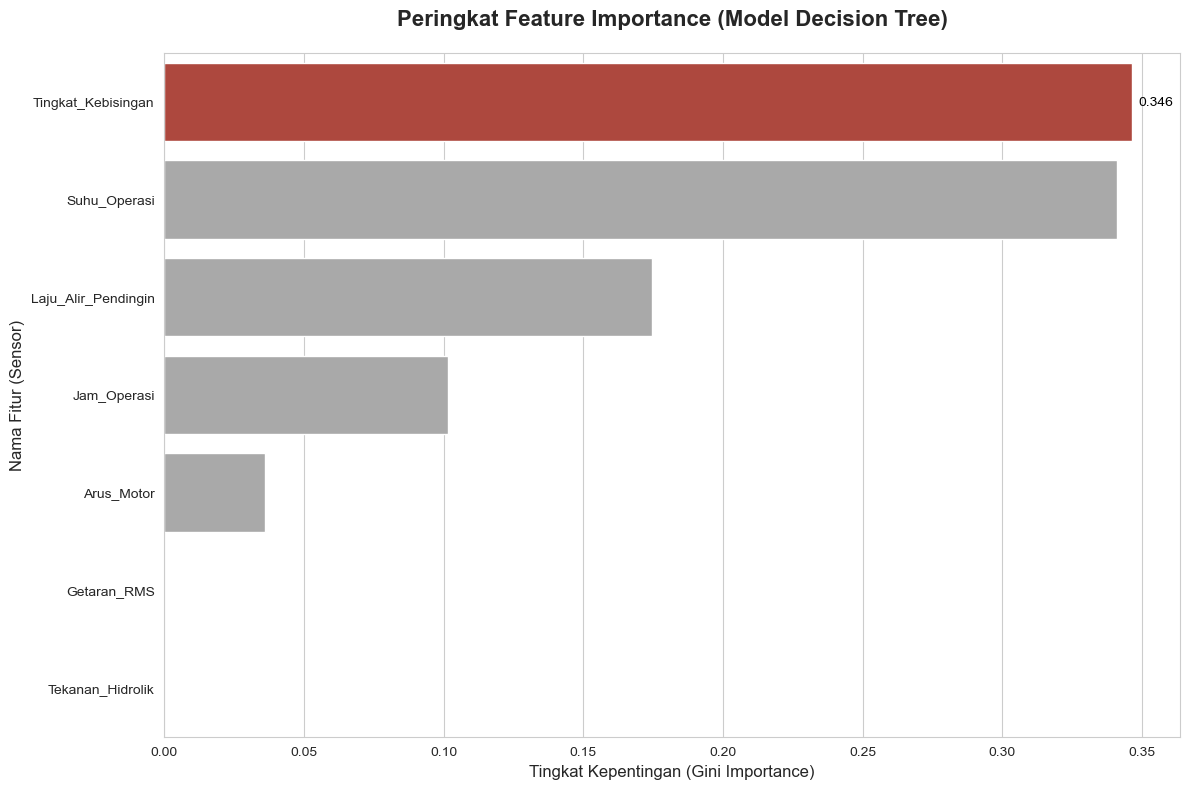

In [21]:
# 1. Atur style & ukuran plot agar terlihat modern
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8)) # Ukuran (lebar, tinggi)
# 2. Sort importance descending
importance_sorted = importance.sort_values(ascending=False)
# 3. Buat palet warna
# Kita buat warna jadi 'abu-abu' semua, KECUALI yang pertama
bar_colors = ['#c0392b'] + ['#a9a9a9'] * (len(importance_sorted) - 1)
# 4. Buat plot horizontal
#    x = Nilai (importance)
#    y = Nama Fitur (index dari series)
ax = sns.barplot(
    x=importance_sorted.values, 
    y=importance_sorted.index, 
    palette=bar_colors # Terapkan palet warna kustom
)
# 5. Tambahkan label angka (data label) pada setiap bar
#    'fmt' digunakan untuk format angka (3 angka di belakang koma)
ax.bar_label(ax.containers[0], fmt='%.3f', padding=5, fontsize=10, color='black')

# 6. Beri judul dan label

# 5. Beri judul dan label
ax.set_title("Peringkat Feature Importance (Model Decision Tree)", fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel("Tingkat Kepentingan (Gini Importance)", fontsize=12)
ax.set_ylabel("Nama Fitur (Sensor)", fontsize=12)
# 6. Rapikan layout dan tampilkan
plt.tight_layout()
plt.show()

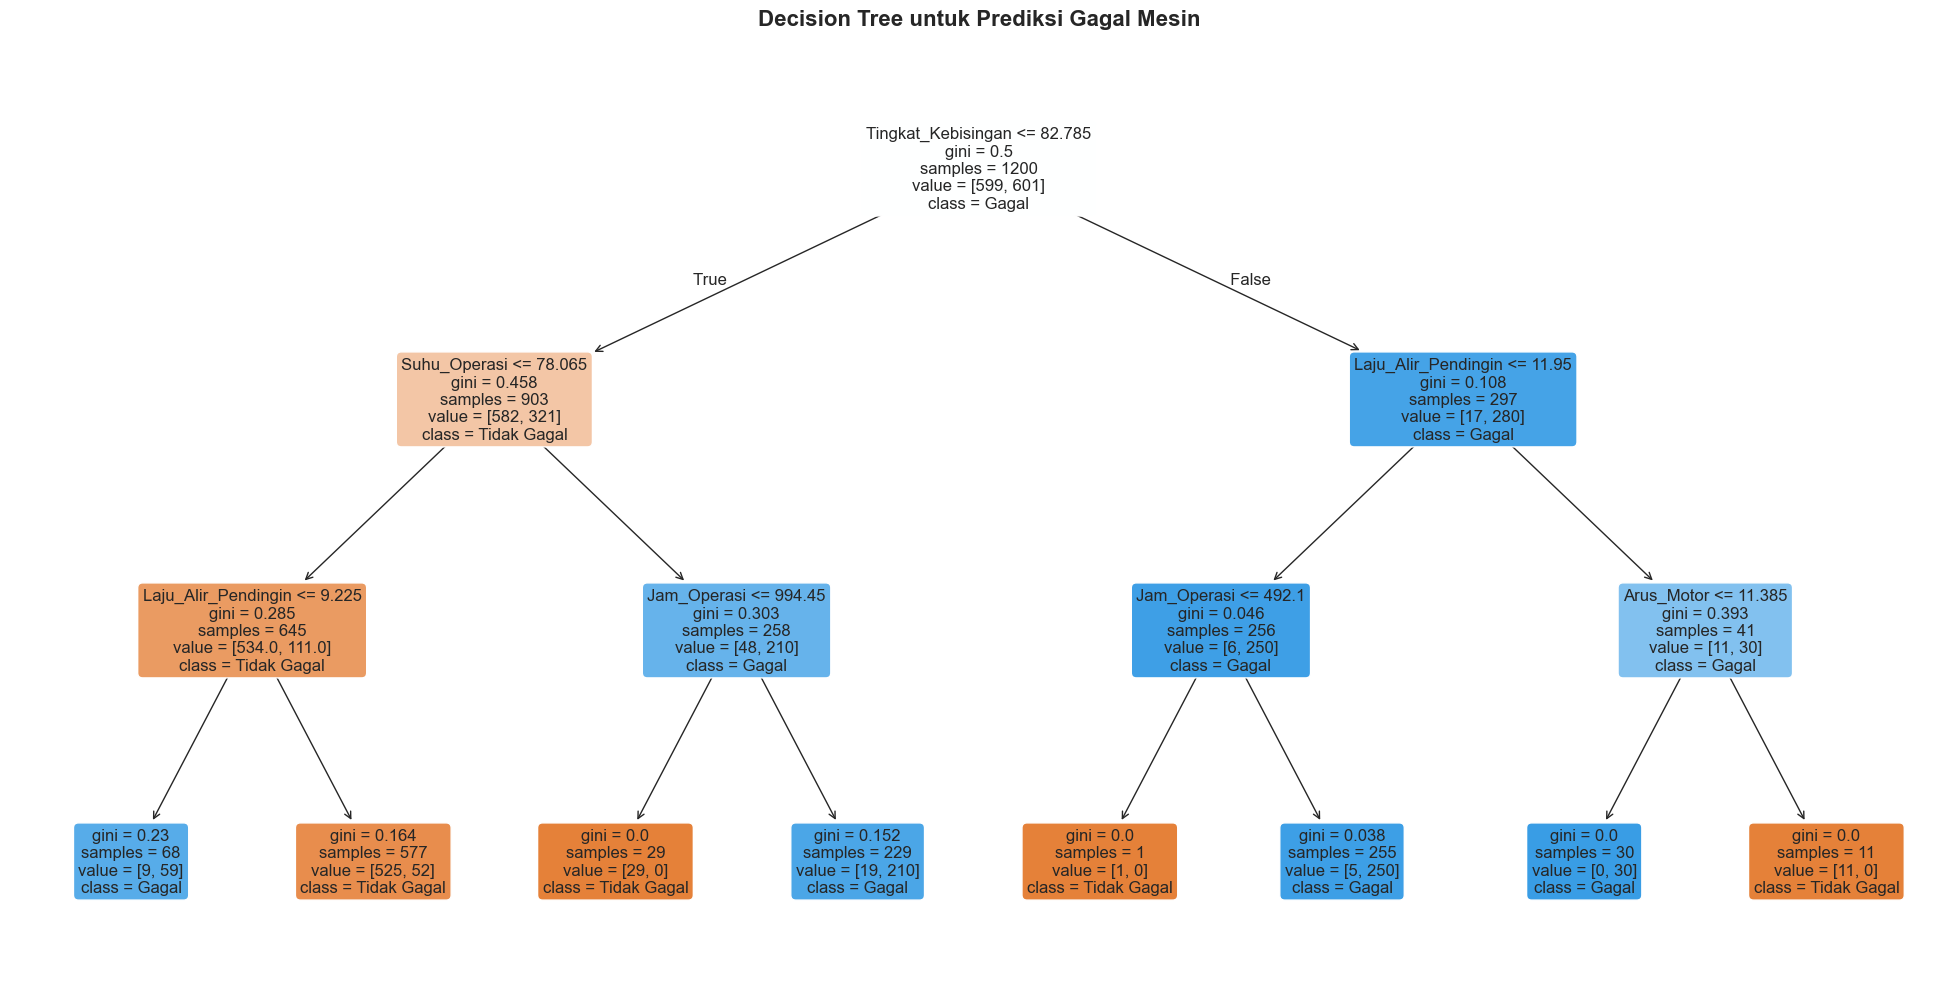

In [24]:
# Visualisasi Pohon Keputusan (Decision Tree)

# Membuat figure dengan ukuran besar agar mudah dibaca
plt.figure(figsize=(25, 12))

# Menggambar struktur pohon keputusan
plot_tree(
    dt,                                              # Model Decision Tree yang sudah di-fit
    feature_names=x.columns.tolist(),                         # Nama-nama fitur dari dataset
    class_names=['Tidak Gagal', 'Gagal'],           # Label kelas target
    filled=True,                                     # Mengisi warna pada node berdasarkan kelas mayoritas
    rounded=True,                                    # Membuat sudut node menjadi bulat
    fontsize=12                                      # Ukuran font teks dalam pohon
)

# Menambahkan judul pada visualisasi
plt.title(
    'Decision Tree untuk Prediksi Gagal Mesin', 
    fontsize=16, 
    fontweight='bold', 
    pad=20
)

# Menampilkan plot
plt.show()